<a href="https://colab.research.google.com/github/pingao2019/DS-Unit-1-Build/blob/master/PingAo_proj1_some_facts_about_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data resource:https://data.world/anaozp/diabetes/workspace/file?filename=diabetes.csv

# Key facts about diabetes from WHO(World Health Organization):
•	The number of people with diabetes has risen from 108 million in 1980 to 422 million in 2014.

•	The global prevalence of diabetes* among adults over 18 years of age has risen from 4.7% in 1980 to 8.5% in 2014 (1).

•	Diabetes prevalence has been rising more rapidly in middle- and low-income countries.

•	Diabetes is a major cause of blindness, kidney failure, heart attacks, stroke and lower limb amputation.

•	In 2016, an estimated 1.6 million deaths were directly caused by diabetes. Another 2.2 million deaths were attributable to high blood glucose in 2012**.

•	Almost half of all deaths attributable to high blood glucose occur before the age of 70 years. It is the seventh leading cause of death in 2016.

.Diabetes is strongly realted to age, obesity, pregancy, blood pressure.

•	Healthy diet, regular physical activity, maintaining a normal body weight and avoiding tobacco use are ways to prevent or delay the onset of type 2 diabetes.

•	Diabetes can be treated with diet, physical activity, medication .

. Normal blood glucose level should be between 70 to 130.
. Normal BMI range is between 18.5 and 24.9.



# What is diabetes?
Insulin is a hormone that regulates blood sugar. Diabetes occurs either when the pancreas does not produce enough insulin (Type 1 diabetes 
or when the body cannot effectively use the insulin it produces(Type 2 diabetes (adult-onset)). 

 Type 2 diabetes comprises the majority of people with diabetes is largely the result of age, excess body weight, physical inactivity, and pregancy.


# What are our purpose?
 1.We can make a model  to predict whether a person has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, pregancy.

2.We can improve the current therapy for diabetes patients.
3.We can see clearly how some factors take so import causing this disease.


In [1]:
import pandas as pd
df=pd.read_csv('diabetesvitaldata.txt')
print(df.shape)
df.head(10)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Outcome '1' stands for having diabetes. '0', no diabetes.

In [0]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The pair plots is very useful for exploring correlations between multidimensional data, which plot all pairs of values against each other

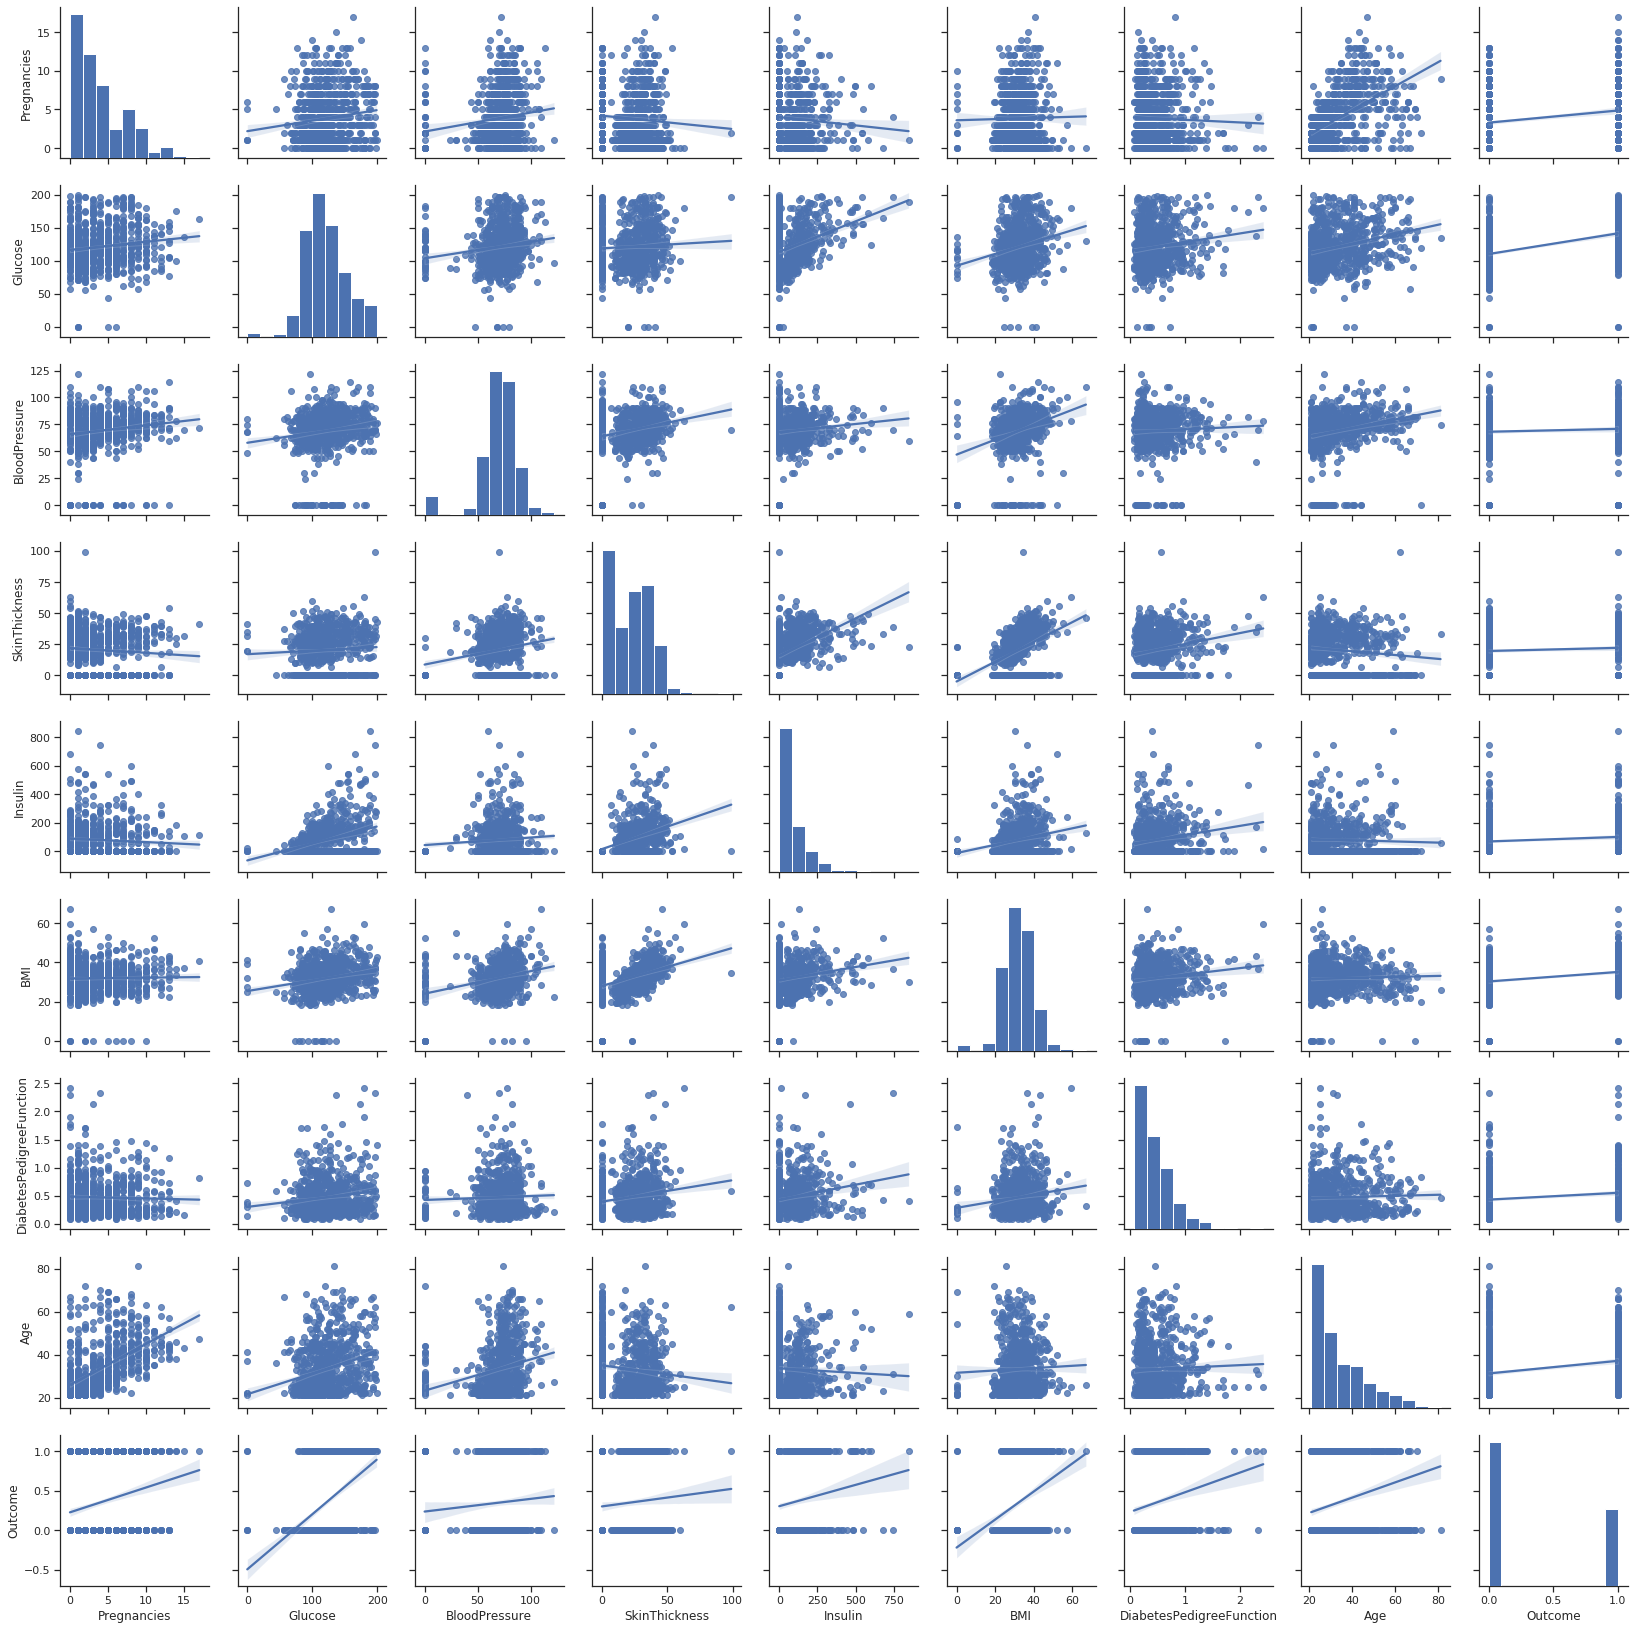

In [7]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df,kind='reg')

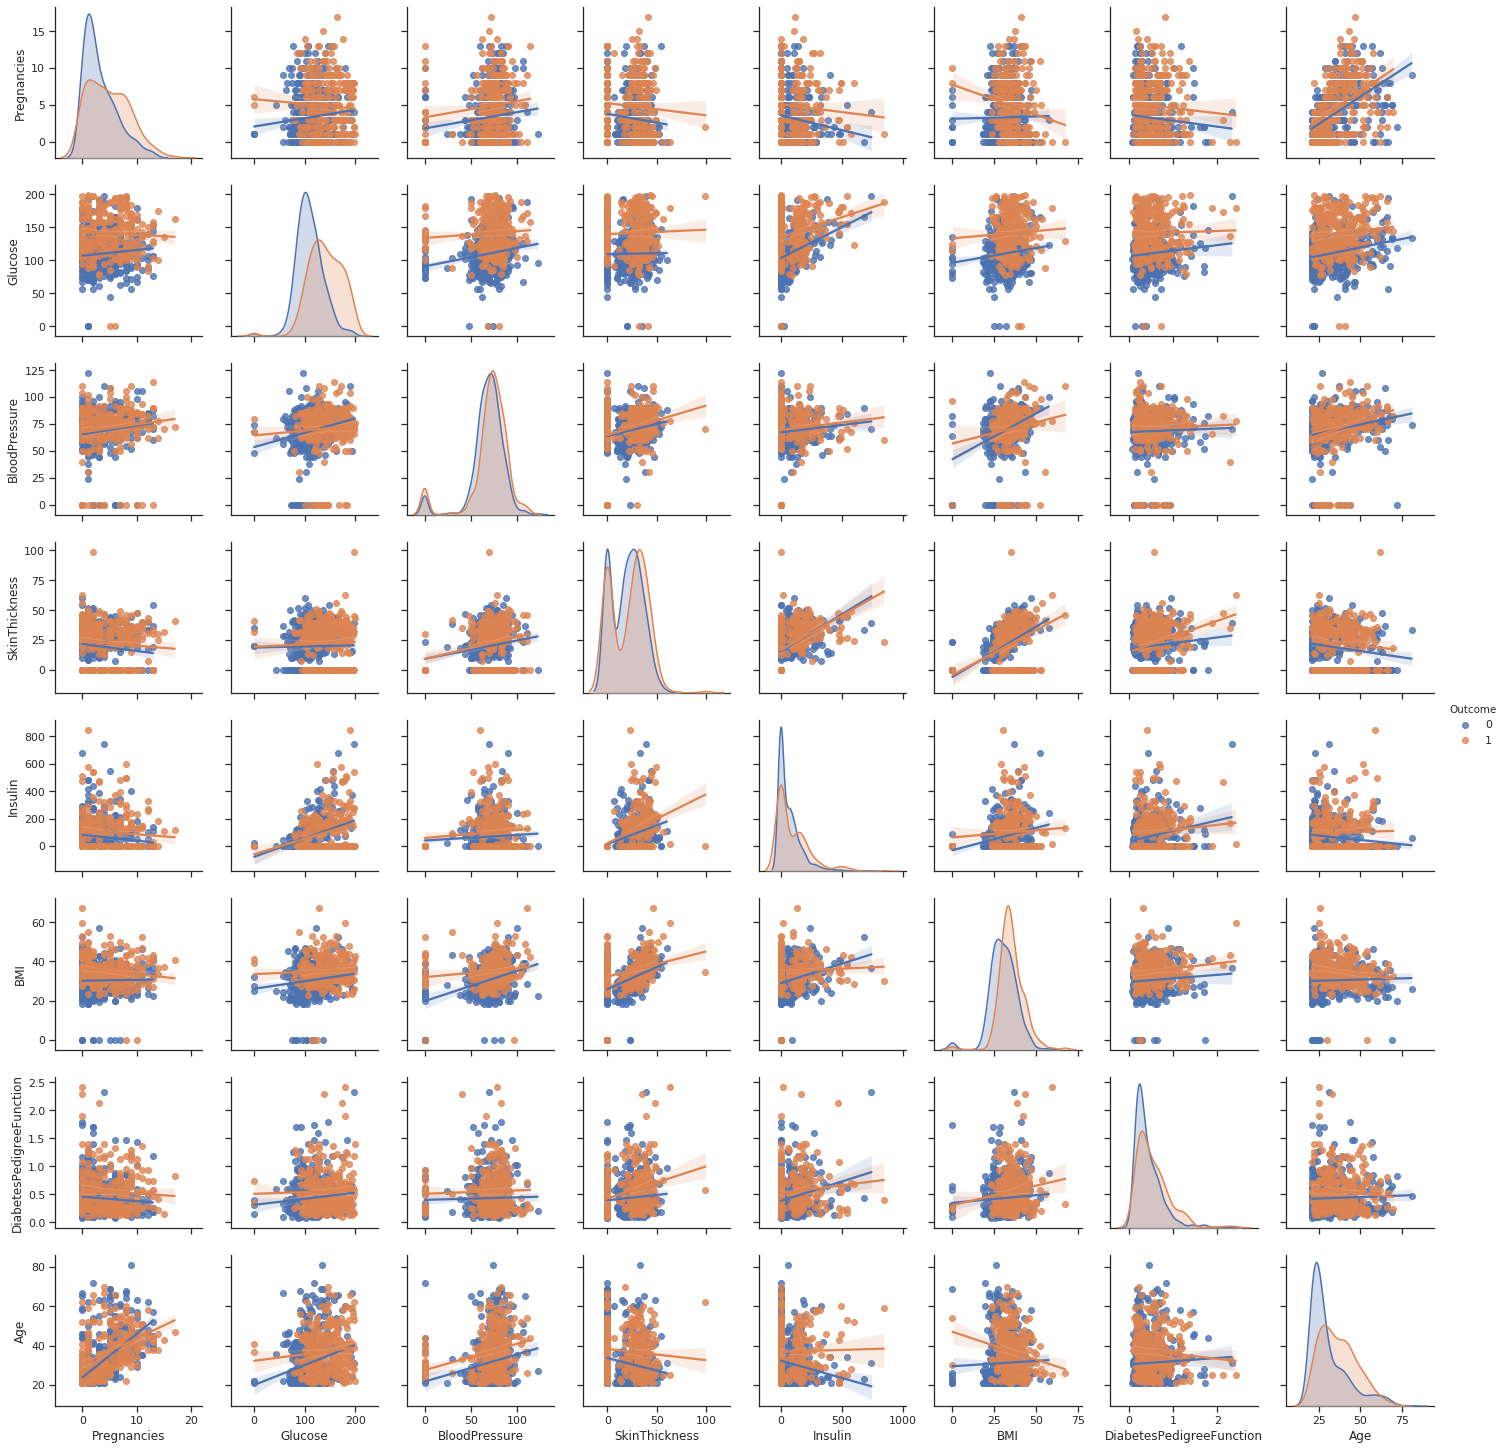

In [3]:
g=sns.pairplot(df,kind='reg',hue='Outcome',diag_kind='kde')

In [0]:
df.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [0]:
import matplotlib.pyplot as plt

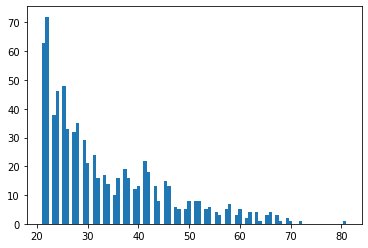

In [0]:
plt.hist(df['Age'], bins=90);

In this dataset, mean of age is 33. It tells us younger people take a bigger ratio.

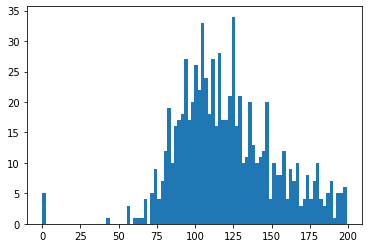

In [0]:
plt.hist(df['Glucose'], bins=90);

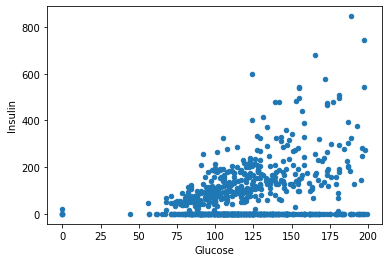

In [0]:

df.plot.scatter(x='Glucose', y='Insulin');

We can see higher glucose level can stimulate body to produce more insulin. 

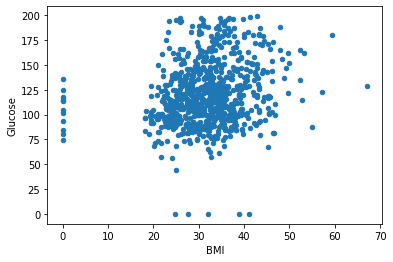

In [0]:
df.plot.scatter(x='BMI', y='Glucose');

We can see BMI affect glucose value. That means overwight and obesity is  associated with diabetes. 

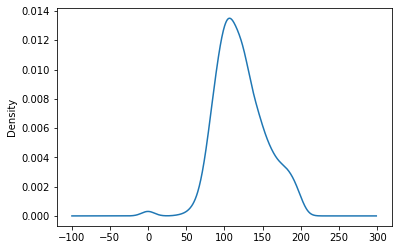

In [0]:
df['Glucose'].plot.density();

The normal blood glucose level should be between 70 to 130. We can see most people's blood sugar is normal.

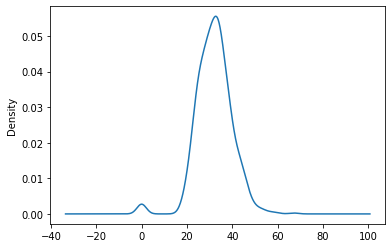

In [0]:
df['BMI'].plot.density();

According to WHO,BMI between 18.5 and 24.9 is  the healthy weight range.Mean of the BMI in our case just is  in this range.It tells us most people's BMI is normal.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [0]:
df.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.354056,13.947131,9.214538,-4.390041,-28.555231,0.469774,-0.037426,21.570620,0.356618
Glucose,13.947131,1022.248314,94.430956,29.239183,1220.935799,55.726987,1.454875,99.082805,7.115079
BloodPressure,9.214538,94.430956,374.647271,64.029396,198.378412,43.004695,0.264638,54.523453,0.600697
SkinThickness,-4.390041,29.239183,64.029396,254.473245,802.979941,49.373869,0.972136,-21.381023,0.568747
Insulin,-28.555231,1220.935799,198.378412,802.979941,13281.180078,179.775172,7.066681,-57.143290,7.175671
BMI,0.469774,55.726987,43.004695,49.373869,179.775172,62.159984,0.367405,3.360330,1.100638
DiabetesPedigreeFunction,-0.037426,1.454875,0.264638,0.972136,7.066681,0.367405,0.109779,0.130772,0.027472
Age,21.570620,99.082805,54.523453,-21.381023,-57.143290,3.360330,0.130772,138.303046,1.336953
Outcome,0.356618,7.115079,0.600697,0.568747,7.175671,1.100638,0.027472,1.336953,0.227483


In [0]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#Conclusion: we can see blood sugar level shows positive relationship with insulin(r=33.13%), age(r=26,35%), BMI(r=22.11%), blood pressure(r=15.26%), pregnancy(r=12.95%). 

In [0]:
K = range(1,11)

# The average distance from each centroid, to the points in its cluster
distortion = []
for k in K:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(df)
  distortion.append(kmeans.inertia_)

distortion

[11615987.397493895,
 5142544.699735325,
 2913492.724649518,
 2151487.010002427,
 1737786.514123533,
 1466742.0960352132,
 1301443.7481267476,
 1137841.9174074298,
 1002046.1127815461,
 930595.9918594388]

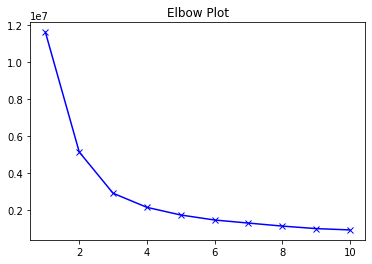

In [0]:
plt.plot(K, distortion, 'bx-')
plt.title("Elbow Plot")

plt.show()

After Elbow Plots, we can judge there are two clusters, one is with diabetes, one is not.

In [0]:
scaler = StandardScaler()
# Use StandardScaler
Z = scaler.fit_transform(df)

Z[0]

array([ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
        0.20401277,  0.46849198,  1.4259954 ,  1.36589591])

In [0]:
pca = PCA(.9)
transformed_data = pca.fit_transform(Z)

In [0]:
len(transformed_data.T)

7

In [0]:
# Cumulative explained variance of the first 7 Principal Components
pca.explained_variance_ratio_.sum()

0.9107676312907247

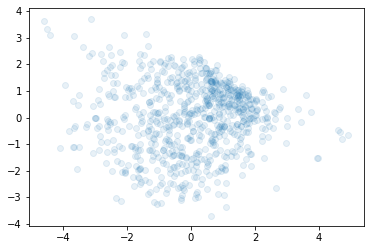

In [0]:
plt.scatter(transformed_data[:,0:1], transformed_data[:,1:2],alpha=0.1)
plt.show()